In [18]:
import cv2
import matplotlib.pyplot as plt

import sys
sys.path.append('./Detector/yolov5')
sys.path.append('./Detector/nanodet')
sys.path.append('./PoseEstimator/UltralightSimplePose')

from Detector.nanodet.nanodet_api import NanodetDetector
from PoseEstimator.UltralightSimplePose.UltraSimplePose_api import UltraSimplePoseEstimator

In [19]:
# nanodet
config_path = './Detector/nanodet/config/nanodet-m_hand.yml'
weight_path = './Detector/nanodet/workspace/nanodet_m_hand//model_best/model_best.ckpt'
detector = NanodetDetector(config_path=config_path, weight_path=weight_path, conf_thresh=0.44)

# posenet
pose_weight_path = './PoseEstimator/UltralightSimplePose/checkpoints/mobilenetv2_epoch_40_acc1_0.96.pt'
trt_pose_weight_path = './PoseEstimator/UltralightSimplePose/deploy/tensorrt/hand_pose_trt.pth'
pose_estimator = UltraSimplePoseEstimator(weight_path=pose_weight_path, trt_weight_path=trt_pose_weight_path)

model size is  1.0x
init weights...
=> loading pretrained model https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth
Finish initialize NanoDet Head.


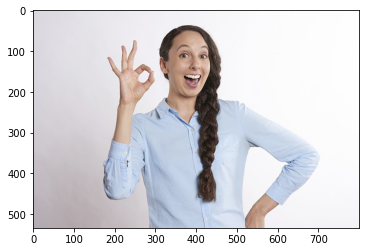

In [23]:
img_path = './docs/ok_symbol.jpg'
img = cv2.imread(img_path)
plt.imshow(img[:, :, ::-1])

In [24]:
detections = detector.get_detections(img)

hand_detections = detections[detections[:, -1]==1]
bboxes = hand_detections[:, :4]
hand_poses = pose_estimator.get_pose(img, bboxes)

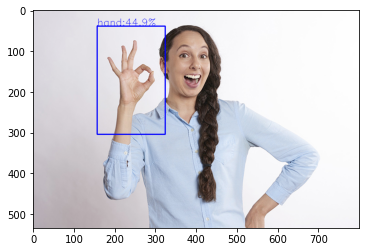

In [25]:
img = detector.detection_plot(img, hand_detections)
plt.imshow(img[:, :, ::-1])

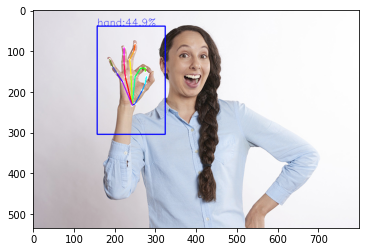

In [22]:
img = pose_estimator.draw_pose(img, hand_poses)
plt.imshow(img[:, :, ::-1])